In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
ross_df=pd.read_csv('train.csv',low_memory=False)
store_df=pd.read_csv('store.csv')
test_df =pd.read_csv('test.csv')

In [5]:

ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [6]:

store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


    We can merge the two data frames to get a richer set of features for each row of the training set.

In [8]:
merged_df=ross_df.merge(store_df,how='left',on='Store')
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


    The dataset also contains a test set

In [10]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [11]:
merged_test_df = test_df.merge(store_df, how='left', on='Store') 
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


    Now the only difference between the training and testing data at this point is that we dont have the columns customer and sales. And sales is what we want to predict

## Cleaning Data
    The first step is to check the column data types and identify if there are any null values.

In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

    There are some null values in coulmns like CompetitionOpenSinceMonth, Promo2SinceWeek etc, so we may have to figure out if we we need to fill it up the null values or do any onehot encoding for categorical features and the NULL value will just become all zeros as ML model can't work with NULL values or we can just ignore these coulmn if they are not needed.

In [16]:
round(merged_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


    It seems like the data, all the ranges seems pretty reasonable. There are no negative values here,so no negative sales
   

    lets check for any dupicate raws

In [19]:
merged_df.duplicated().sum()

0

    Let's also parse the date column

In [21]:
merged_df['Date']=pd.to_datetime(merged_df.Date)

In [22]:
merged_test_df['Date']=pd.to_datetime(merged_test_df.Date)

In [23]:
merged_df.Date.min(), merged_df.Date.max() #train data from 2013-01-01 to 2015-07-31

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [24]:
merged_test_df.Date.min(), merged_test_df.Date.max() 

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

## Exploratory Data Analysis and Visualization
    Let's study the distribution of the target "Sales" column

<Axes: xlabel='Sales', ylabel='Count'>

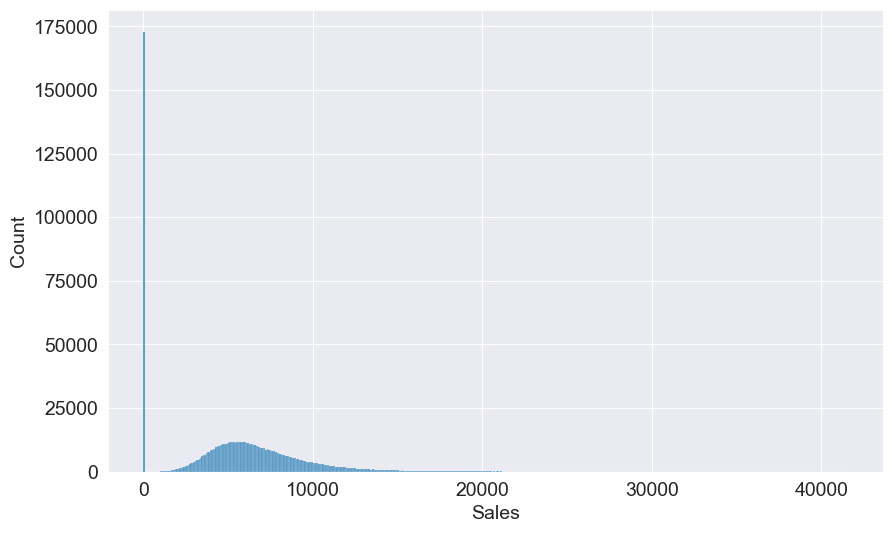

In [26]:
sns.histplot(data=merged_df, x='Sales')

    It seems like  the sales are 0 on so many dates,Let's check if this is because the store was closed.

In [28]:
merged_df.Open.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [29]:
merged_df.Open.value_counts()[0]

172817

    To make our modeling simple, let's simply exclude the dates when the store was closed (we can handle it as a special case while making predictions.

In [31]:
merged_df=merged_df[merged_df.Open==1].copy()

<Axes: xlabel='Sales', ylabel='Count'>

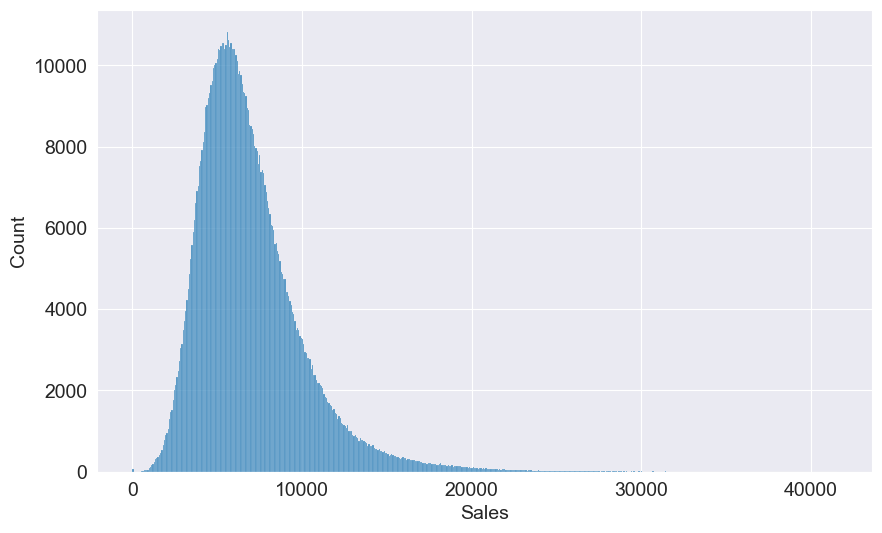

In [32]:
sns.histplot(data=merged_df, x='Sales')

    Let's explore some other columns

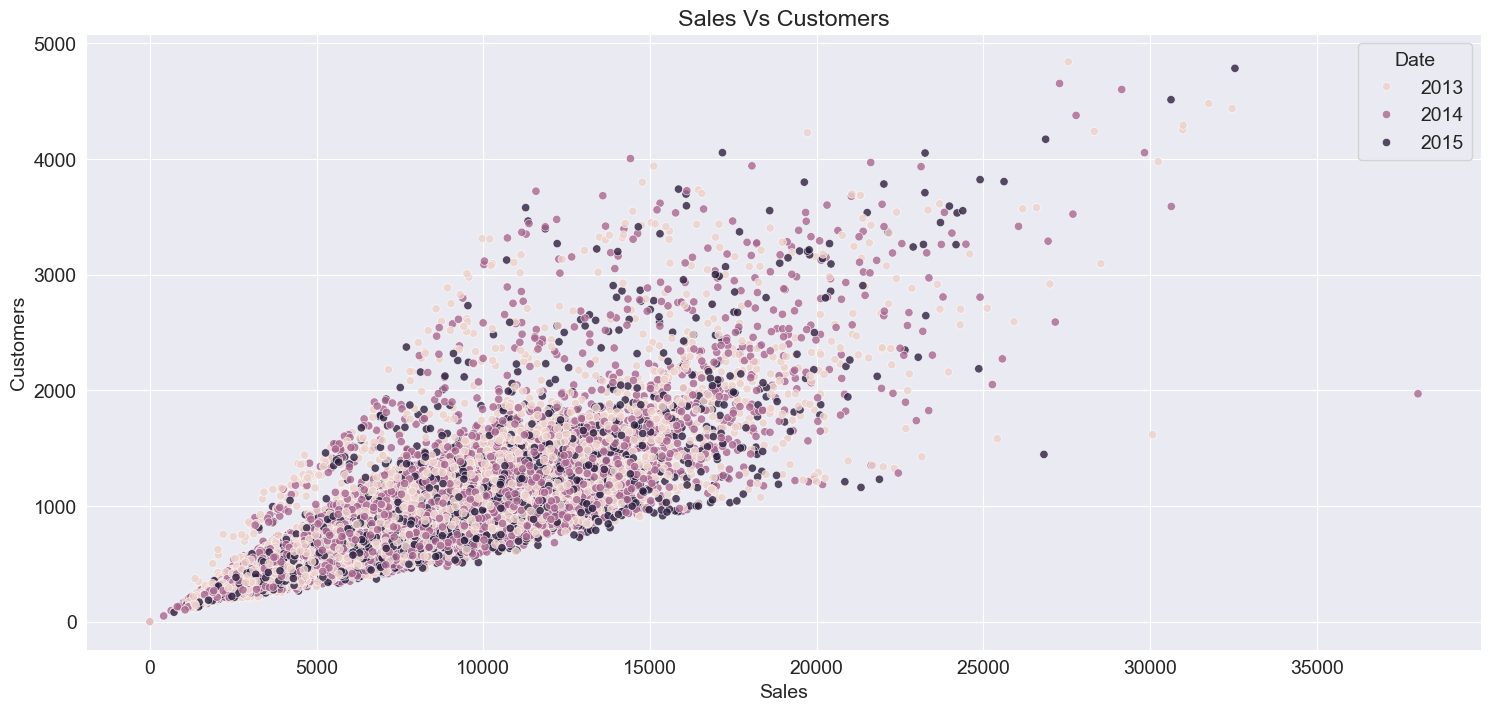

In [34]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(40000)
sns.scatterplot(x=temp_df.Sales, y=temp_df.Customers, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Sales Vs Customers")
plt.show()

    Looks like there is a strong corelation between customer and sales. The more customer we have the more the sale is, but we need to keep this mind that this is not necessarily true because sometimes some customers spend more as in this scatterplot these are day wise data. Also we cannot use customer column, because we dont know howw many customer are going to come to the stores a few days later 

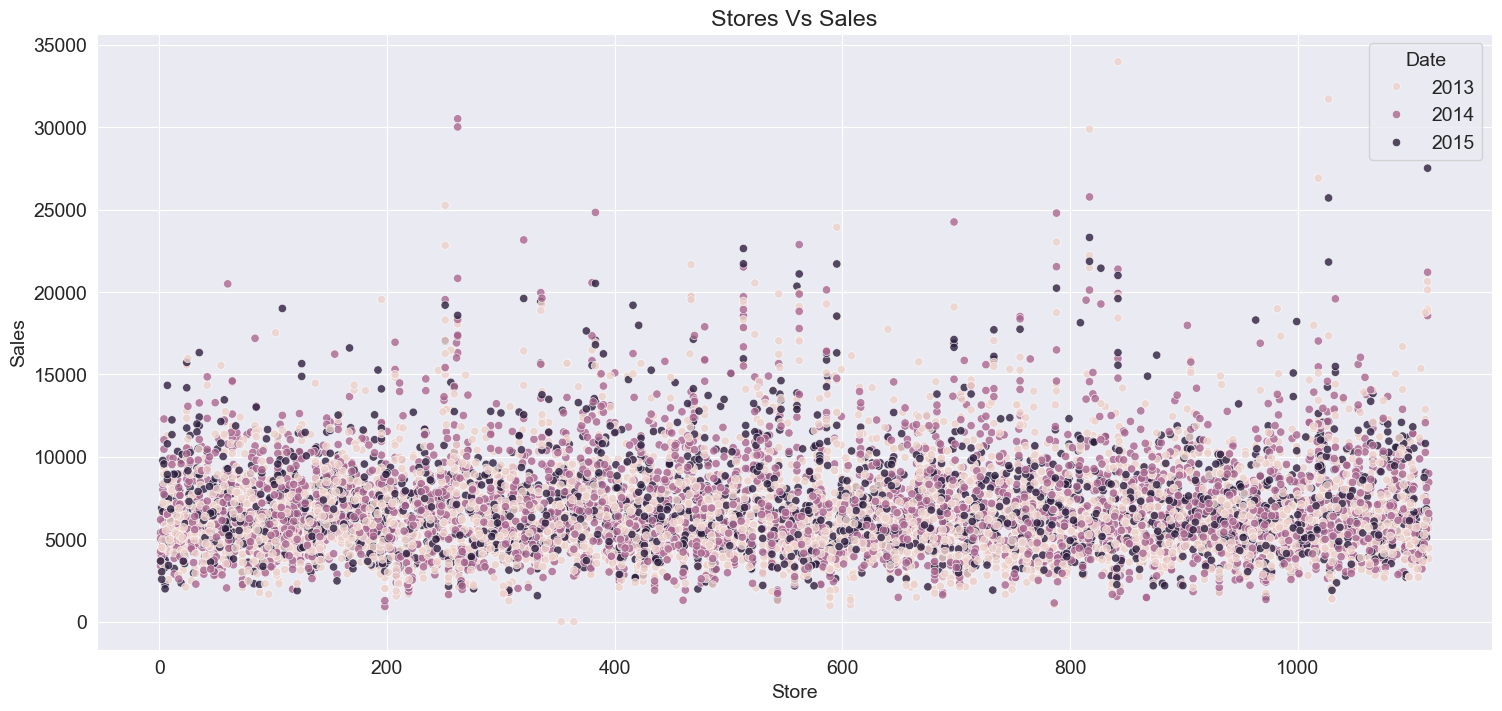

In [36]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(10000)
sns.scatterplot(x=temp_df.Store, y=temp_df.Sales, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Stores Vs Sales")
plt.show()

C:\Users\amrit\AppData\Local\Temp\ipykernel_1892\3387686068.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='DayOfWeek', ylabel='Sales'>

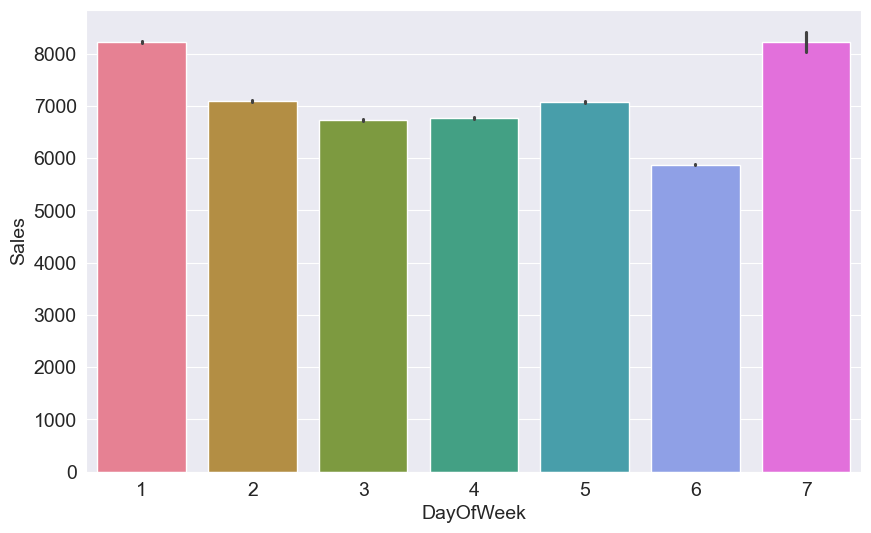

In [37]:
sns.barplot(data=merged_df, x='DayOfWeek', y='Sales',palette="husl")

C:\Users\amrit\AppData\Local\Temp\ipykernel_1892\558664796.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Promo', ylabel='Sales'>

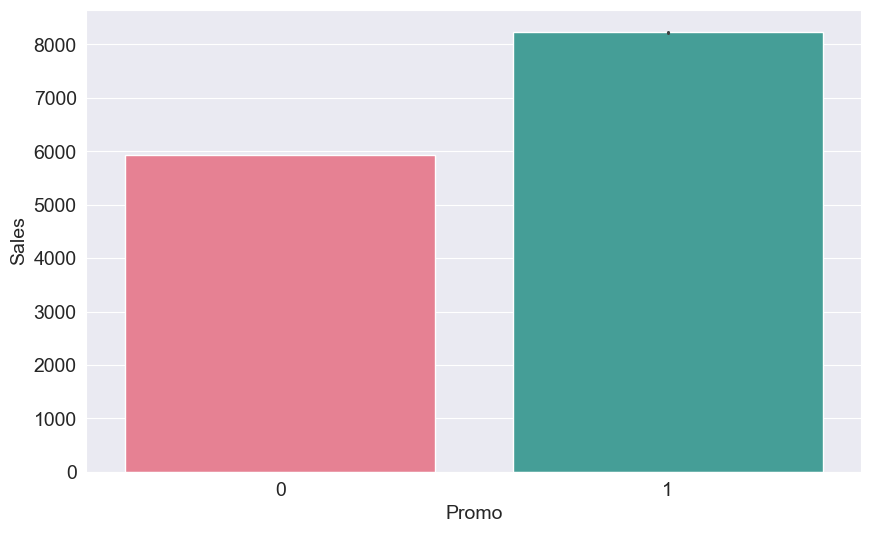

In [38]:
sns.barplot(data=merged_df, x='Promo', y='Sales',palette="husl")

In [39]:

# Converting all numeric columns to float (ignoring errors)
merged_df_numeric = merged_df.apply(pd.to_numeric, errors='coerce')

# Checking for non-numeric columns (if any)
non_numeric_columns = merged_df.columns[merged_df.dtypes == 'object']
print("Non-numeric columns:", non_numeric_columns)

# Now calculating correlation, ignoring NaN values
correlation = merged_df_numeric.corr()['Sales'].sort_values(ascending=False)
print(correlation)

Non-numeric columns: Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')
Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
Promo2SinceWeek              0.095311
Date                         0.062757
SchoolHoliday                0.038617
CompetitionOpenSinceYear     0.016101
Store                        0.007710
Promo2SinceYear             -0.034713
CompetitionDistance         -0.036396
CompetitionOpenSinceMonth   -0.043489
Promo2                      -0.127596
DayOfWeek                   -0.178736
Open                              NaN
StateHoliday                      NaN
StoreType                         NaN
Assortment                        NaN
PromoInterval                     NaN
Name: Sales, dtype: float64


    The store is not really useful correlation because store is being treated here as a numerical value, but its more of a categorical value, we aren't see much correlation with store here. but store should have a big impact on the sale

# Feature Engineering
    Feature engineer is the process of creating new features (columns) by transforming/combining existing features or by incorporating data from external sources.

    For example, here are some features that can be extracted from the "Date" column:

Day of week

Day or month

Month

Year

Weekend/Weekday

Month/Quarter End

In [42]:
merged_df['Date']

0         2015-07-31
1         2015-07-31
2         2015-07-31
3         2015-07-31
4         2015-07-31
             ...    
1016776   2013-01-01
1016827   2013-01-01
1016863   2013-01-01
1017042   2013-01-01
1017190   2013-01-01
Name: Date, Length: 844392, dtype: datetime64[ns]

In [43]:
merged_df['Day']=merged_df.Date.dt.day
merged_df['Month']=merged_df.Date.dt.month
merged_df['Year']=merged_df.Date.dt.year

In [44]:
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Year'] = merged_test_df.Date.dt.year

C:\Users\amrit\AppData\Local\Temp\ipykernel_1892\953386222.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Year', ylabel='Sales'>

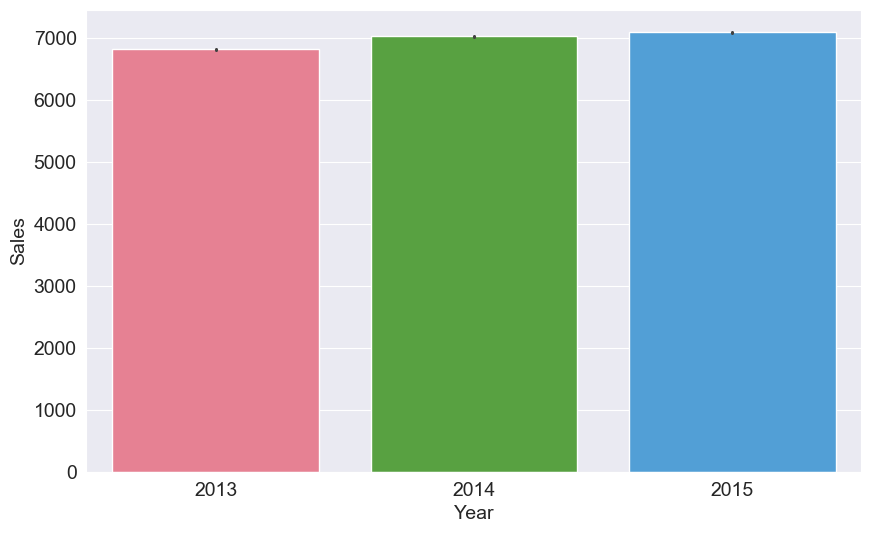

In [45]:
sns.barplot(data=merged_df, x='Year', y='Sales',palette="husl")

C:\Users\amrit\AppData\Local\Temp\ipykernel_1892\152383769.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Month', ylabel='Sales'>

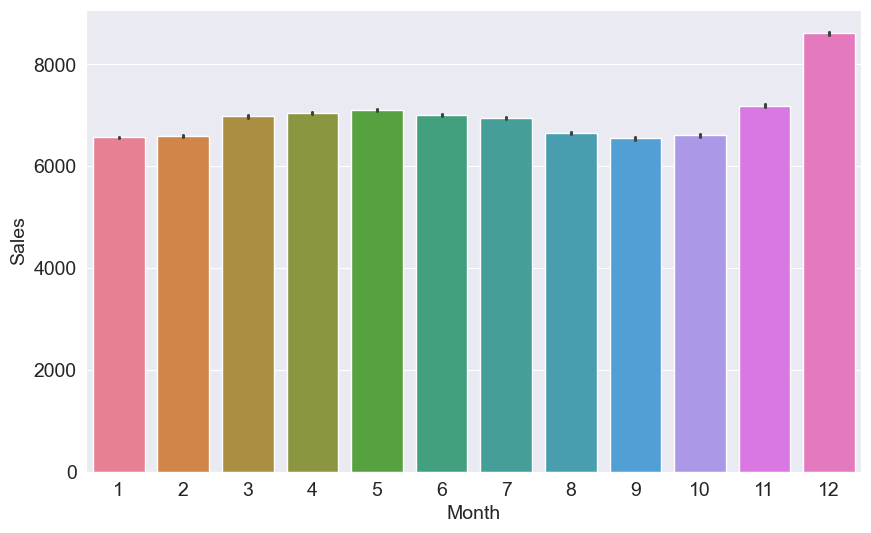

In [46]:
sns.barplot(data=merged_df, x='Month', y='Sales',palette="husl")

In [47]:
merged_df['Day']

0          31
1          31
2          31
3          31
4          31
           ..
1016776     1
1016827     1
1016863     1
1017042     1
1017190     1
Name: Day, Length: 844392, dtype: int32


## Train/Test/Validation Split
    The data already contains a test set, which contains over one month of data after the end of the training set. We can apply a similar strategy to create a validation set. We'll use the last 25% of rows for the validation set, after ordering by date

In [49]:
len(merged_df)

844392

In [50]:
train_size=int(.75*len(merged_df))
train_size

633294

In [51]:
sorted_df=merged_df.sort_values('Date')
train_df,val_df=sorted_df[:train_size],sorted_df[train_size:]
len(train_df),len(val_df)

(633294, 211098)

In [52]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,b,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,a,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,b,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,a,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,b,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,745,3,2014-12-10,6897,657,1,0,0,0,a,a,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",10,12,2014
256642,756,3,2014-12-10,15736,2292,1,0,0,0,a,c,50.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
256634,747,3,2014-12-10,7444,608,1,0,0,0,c,c,45740.0,8.0,2008.0,0,NaN,NaN,NaN,10,12,2014
256633,746,3,2014-12-10,5207,474,1,0,0,0,d,c,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",10,12,2014


In [53]:
val_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
256637,751,3,2014-12-10,3720,533,1,0,0,0,a,a,650.0,10.0,2006.0,0,NaN,NaN,NaN,10,12,2014
256638,752,3,2014-12-10,4258,404,1,0,0,0,a,a,970.0,3.0,2013.0,1,31.0,2013.0,"Feb,May,Aug,Nov",10,12,2014
256639,753,3,2014-12-10,7170,654,1,0,0,0,d,c,540.0,11.0,2012.0,1,35.0,2010.0,"Mar,Jun,Sept,Dec",10,12,2014
256640,754,3,2014-12-10,7359,837,1,0,0,0,c,c,380.0,5.0,2008.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec",10,12,2014
256635,748,3,2014-12-10,4579,411,1,0,0,0,d,a,2380.0,3.0,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,745,5,2015-07-31,8363,746,1,1,0,1,a,a,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",31,7,2015
745,746,5,2015-07-31,9082,638,1,1,0,1,d,c,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",31,7,2015
746,747,5,2015-07-31,10708,826,1,1,0,1,c,c,45740.0,8.0,2008.0,0,NaN,NaN,NaN,31,7,2015
740,741,5,2015-07-31,11253,1137,1,1,0,1,d,c,11900.0,NaN,NaN,0,NaN,NaN,NaN,31,7,2015


In [54]:
train_df.Date.min(), train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [55]:
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [56]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [57]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

## Input and Target columns
    Let's also identify input and target columns. Note that we can't use the no. of customers as an input, because this information isn't available beforehand. Also, we needn't use all the available columns, we can start out with just a small subset.

In [59]:
input_cols=['Store', 'DayOfWeek', 'Promo',
       'StateHoliday',  'StoreType', 'Assortment',
       'Day', 'Month', 'Year']


In [60]:
target_cols='Sales'

    Let's also separate out numeric and categorical columns.

In [62]:
merged_df[input_cols].nunique()

Store           1115
DayOfWeek          7
Promo              2
StateHoliday       4
StoreType          4
Assortment         3
Day               31
Month             12
Year               3
dtype: int64

In [63]:
train_inputs,train_targets=train_df[input_cols].copy(),train_df[target_cols].copy()
val_inputs,val_targets=val_df[input_cols].copy(),val_df[target_cols].copy()

In [64]:
test_inputs=merged_test_df[input_cols].copy()
# Test data does not have targets

    Note that some columns can be treated as both numeric and categorical, and it's up t you to decide how you want to deal with them.

    Technically Store should treated as a categorical coulmn but the difficulty is creating  1115 coulmns of data is going to severely increase the size of the dataset. And also its going to make the models a bit harder to train because of something called curse of dimensionality, which means that if we have lots of different features, which all are closely correlated, then that alot easier for model to overfit, because now it has a lot more parameter to process with. So it can very easily overfit to the training data. And those models generally do not generalize very well. 
   
    linear model may be struggled when we have categorical data trated as numerical, but Decision  trees generally should be able to sort it out

In [67]:
numeric_cols= ['Store', 'Day', 'Promo','Month', 'Year']

In [68]:
categorical_cols=['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

# Imputation, Scaling and Encode
    Let's impute missing data from numeric columns and scale the values to the (0,1) range.

In [70]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])


In [71]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [72]:
test_inputs[numeric_cols].isna().sum()

Store    0
Day      0
Promo    0
Month    0
Year     0
dtype: int64

    Note that this step wasn't necessary for the store sales dataset, as there were no null values. Also, we can apply a different imputation strategy to different columns depending on their distributions (e.g. mean for normally distribute and median for exponentially distributed).

    Let's also scale the values to the (0,1) range.

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [76]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [77]:
train_inputs

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year
1017190,0.983842,2,0.0,a,b,b,0.0,0.0,0.0
1016179,0.075404,2,0.0,a,b,a,0.0,0.0,0.0
1016353,0.231598,2,0.0,a,b,b,0.0,0.0,0.0
1016356,0.234291,2,0.0,a,b,a,0.0,0.0,0.0
1016368,0.245063,2,0.0,a,b,b,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
256632,0.667864,3,0.0,0,a,a,0.3,1.0,1.0
256642,0.677738,3,0.0,0,a,c,0.3,1.0,1.0
256634,0.669659,3,0.0,0,c,c,0.3,1.0,1.0
256633,0.668761,3,0.0,0,d,c,0.3,1.0,1.0


    let's encode categorical columns as one-hot vectors.

In [79]:
from sklearn.preprocessing import OneHotEncoder

In [80]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))

In [81]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [82]:
train_inputs

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,2,0.0,a,b,b,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,2,0.0,a,b,a,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,2,0.0,a,b,b,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,2,0.0,a,b,a,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,2,0.0,a,b,b,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,0.667864,3,0.0,0,a,a,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256642,0.677738,3,0.0,0,a,c,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
256634,0.669659,3,0.0,0,c,c,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
256633,0.668761,3,0.0,0,d,c,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


    Let's now extract out the numeric data.

In [84]:
X_train=train_inputs[numeric_cols+encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [85]:
X_train

,Store,Day,Promo,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,0.667864,0.3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256642,0.677738,0.3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
256634,0.669659,0.3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
256633,0.668761,0.3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0




    A quick baseline model helps establish the minimum score any ML model you train should achieve.

### Fixed/Random Guess
    Let's define a model that always returns the mean value of Sales as the prediction.

In [87]:
merged_df.Sales.mean()

6955.514290755952

In [88]:
def return_mean(input):
    return np.full(len(input),merged_df.Sales.mean())

In [89]:
train_preds = return_mean(X_train)
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

    Let's evaluate this to using the RMSE score.

In [91]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(train_preds, train_targets)

3082.450443277419

In [92]:
def rmspe(target, pred):
    target = np.array(target)
    pred = np.array(pred)
    
    # Filter out zero values in target
    non_zero_mask = target != 0
    target = target[non_zero_mask]
    pred = pred[non_zero_mask]
    
    # Calculate RMSPE
    rmspe_value = np.sqrt(np.mean(((target - pred) / target) ** 2)) * 100
    return f"{rmspe_value:.2f}%"


In [93]:
rmspe(train_targets,train_preds)

'65.17%'

In [94]:
root_mean_squared_error(return_mean(X_val), val_targets),rmspe(train_targets,train_preds)

(3168.6033635047716, '65.17%')

    The model is off by about $3000 on average.
    If our model's RMSE is higher than the baseline RMSE (3082.45), it means:

- our model is worse than simply predicting the average sales for all cases.

It indicates our model has failed to learn any useful pattern and is performing worse than a basic average-based approach.

What This Implies:

- model is useless if its RMSE is higher than the baseline.

- we should aim for an RMSE significantly lower than the baseline.

    Lets create a helper function to check all model

In [97]:

def try_model(model):
    # Fit the model
    model.fit(X_train,train_targets)

    # Generate predictions
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_val)

    # Compute RMSE
    train_rmse=root_mean_squared_error(train_preds,train_targets)
    val_rmse = root_mean_squared_error(val_targets, val_preds)
    return train_rmse,val_rmse
    

# Linear Models


In [99]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [100]:
try_model(LinearRegression())

(2741.621903798656, 2818.043580445419)

In [101]:
try_model(Ridge())

(2741.587195090344, 2817.7784630687306)

In [102]:
try_model(Lasso())

(2741.7143903412966, 2817.947289745474)

In [103]:
try_model(ElasticNet())

(2919.7592486698477, 3010.8450540391977)

In [104]:
try_model(SGDRegressor())

(2742.223543703412, 2813.2692790096166)

    We can see the linear model are not doing very well, may be bacause the relationship are not linear between input and target. Sale is not linear combination of the input columns. It's non linear relationship

# Tree Based Models


In [107]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [108]:
tree=DecisionTreeRegressor(random_state=42)
try_model(tree)

(0.0, 1550.0387025163966)

    Seems like the decision tree performs much better than linear models.

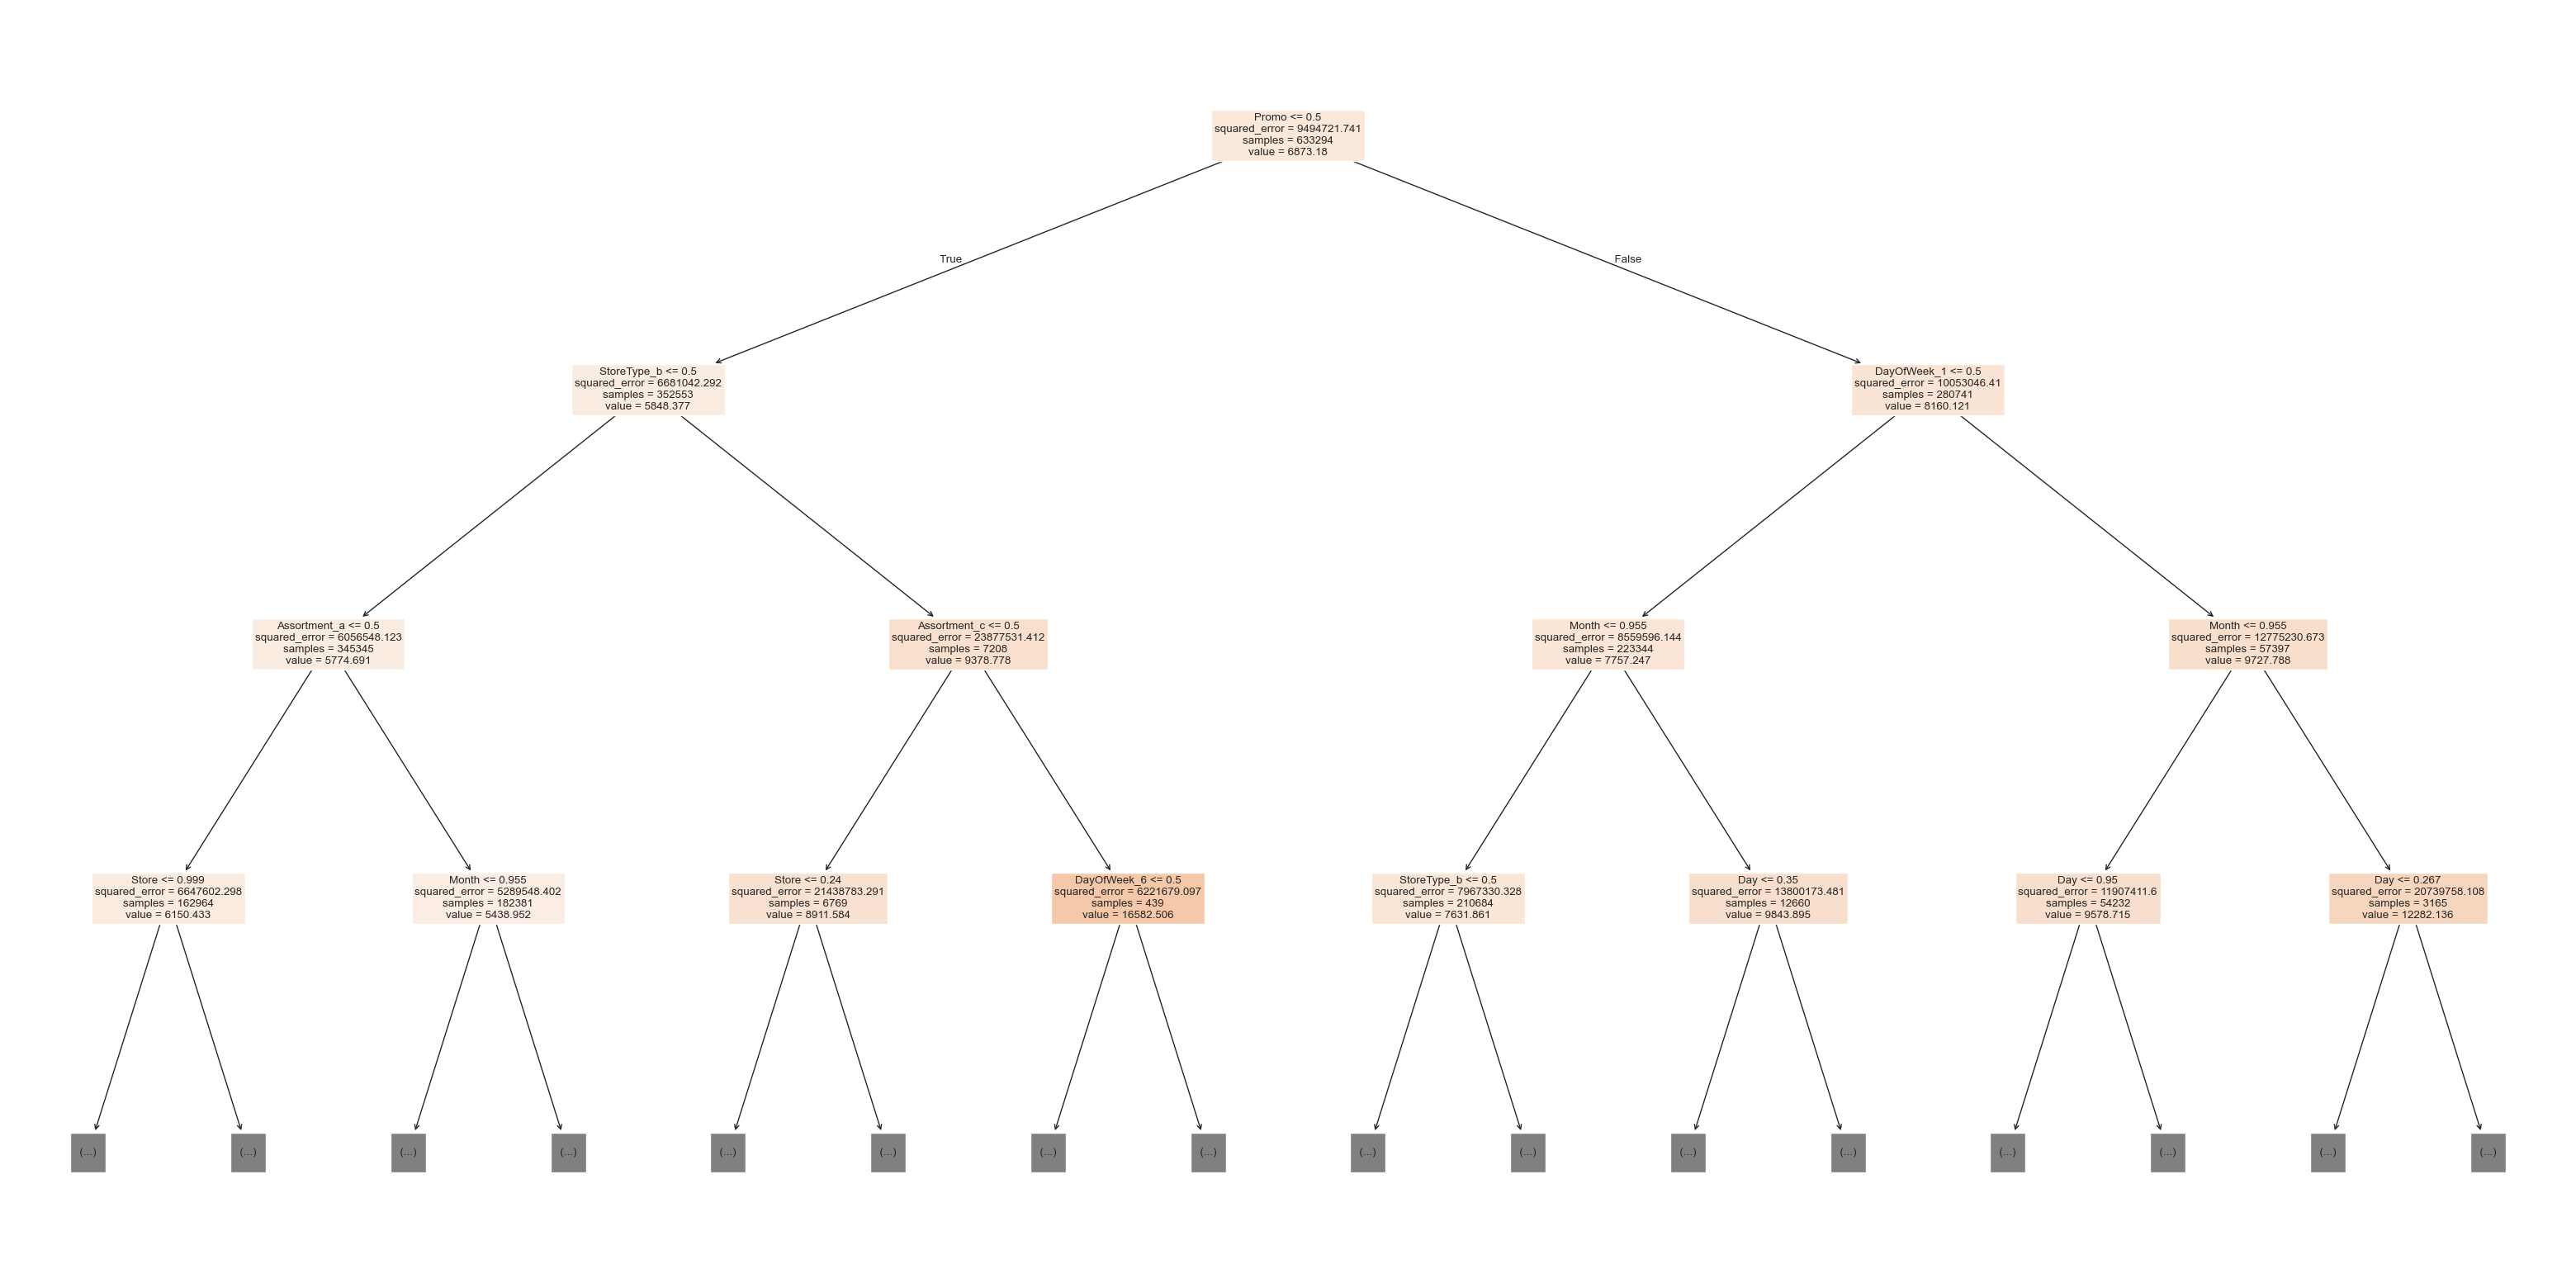

In [110]:
plt.figure(figsize=(40, 20))
plot_tree(tree, max_depth=3, filled=True, feature_names=numeric_cols+encoded_cols);

In [111]:
%%time
#Let's try a random forest.

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
try_model(rf)

CPU times: total: 10min 21s
Wall time: 1min


(474.98976880814877, 1370.5848972687284)

    We've seen a significant reduction in the loss by using a random forest.



## Ensembling
    Ensembling refers to combining the results of multiple models.
    Lets create a Stacked Ensemble with three models:

- RandomForest (highest weight)

- Decision Tree (medium weight)

- Ridge Regression (lowest weight)


In [114]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize models
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
ridge_model = Ridge()
dt_model = DecisionTreeRegressor(random_state=42)

# Train models separately
rf_model.fit(X_train, train_targets)
ridge_model.fit(X_train, train_targets)
dt_model.fit(X_train, train_targets)

# Predict using all three models
rf_preds = rf_model.predict(X_val)
ridge_preds = ridge_model.predict(X_val)
dt_preds = dt_model.predict(X_val)

# Stacked Ensemble with Weighted Averaging
ensemble_preds = (0.6 * rf_preds + 0.3 * dt_preds + 0.1 * ridge_preds)

# Calculate RMSE for each model and ensemble
rf_rmse,rf_rmspe = np.sqrt(mean_squared_error(val_targets, rf_preds)),rmspe(val_targets, rf_preds)
ridge_rmse,ridge_rmspe = np.sqrt(mean_squared_error(val_targets, ridge_preds)),rmspe(val_targets, ridge_preds)
dt_rmse,dt_rmspe = np.sqrt(mean_squared_error(val_targets, dt_preds)),rmspe(val_targets, dt_preds)
ensemble_rmse, ensemble_rmspe= np.sqrt(mean_squared_error(val_targets, ensemble_preds)),rmspe(val_targets, ensemble_preds)

print("RandomForest RMSE & RMSPE:", rf_rmse,rf_rmspe)
print("Decision Tree RMSE & RMSPE:", dt_rmse,dt_rmspe)
print("Ridge RMSE & RMSPE:", ridge_rmse,ridge_rmspe)
print("Stacked Ensemble RMSE & RMSPE:", ensemble_rmse,ensemble_rmspe)

RandomForest RMSE & RMSPE: 1370.5848972687284 21.17%
Decision Tree RMSE & RMSPE: 1550.0387025163966 22.91%
Ridge RMSE & RMSPE: 2817.7784630687306 47.62%
Stacked Ensemble RMSE & RMSPE: 1360.7552936180577 21.20%


## Feature Importance

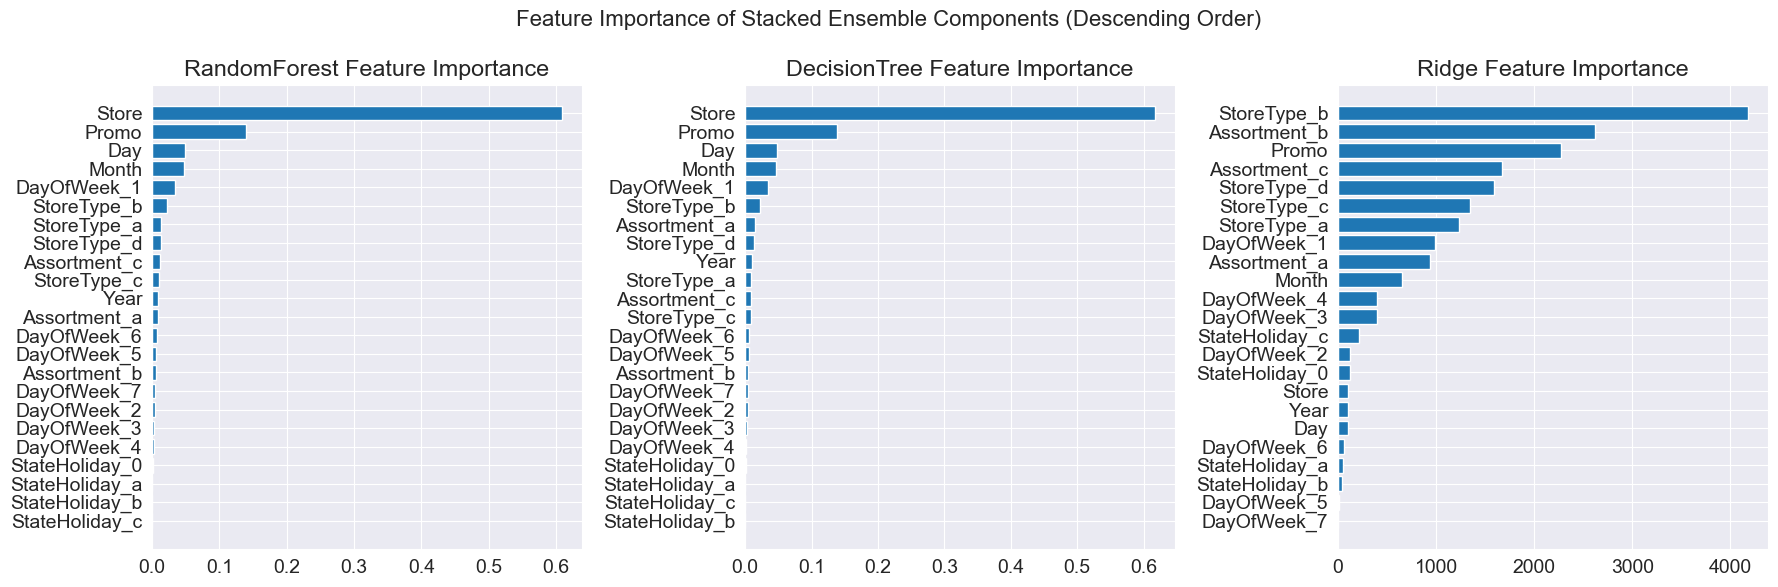

In [116]:
# Sorting Feature Importances in Descending Order for Each Model
rf_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
dt_importances = pd.Series(dt_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
ridge_importances = pd.Series(np.abs(ridge_model.coef_), index=X_train.columns).sort_values(ascending=False)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Feature Importance of Stacked Ensemble Components (Descending Order)', fontsize=16)

# RandomForest
axes[0].barh(rf_importances.index, rf_importances.values)
axes[0].set_title('RandomForest Feature Importance')
axes[0].invert_yaxis()

# DecisionTree
axes[1].barh(dt_importances.index, dt_importances.values)
axes[1].set_title('DecisionTree Feature Importance')
axes[1].invert_yaxis()

# Ridge
axes[2].barh(ridge_importances.index, ridge_importances.values)
axes[2].set_title('Ridge Feature Importance')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()

    Lets check score on the test set.

In [118]:
# Predict on X_test using all three models
rf_test_preds = rf_model.predict(X_test)
dt_test_preds = dt_model.predict(X_test)
ridge_test_preds = ridge_model.predict(X_test)

# Apply the Stacked Ensemble (same weights)
test_preds = (0.6 * rf_test_preds + 0.3 * dt_test_preds + 0.1 * ridge_test_preds)

# Display first 10 predictions
print("Stacked Ensemble Test Predictions (First 10):")
print(test_preds[:10])

Stacked Ensemble Test Predictions (First 10):
[4420.72903405 7670.15856137 8717.46538978 7020.56750859 6761.37016867
 5939.30228748 8117.63494756 8298.526337   5950.90029066 5825.40584526]


In [119]:

submission_df=pd.read_csv('sample_submission.csv')
submission_df['Sales'] = test_preds * test_df['Open'].astype('float')
submission_df.fillna(0, inplace=True)
submission_df.to_csv('submission.csv', index=None)


In [120]:
submission_df.head()

,Id,Sales
0,1,4420.729034
1,2,7670.158561
2,3,8717.465390
3,4,7020.567509
4,5,6761.370169
